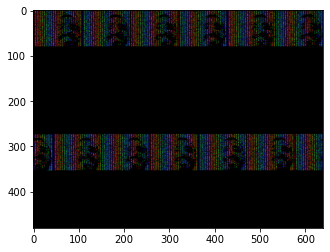

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pynq import Overlay, MMIO
from PIL import Image

# Load the overlay
overlay = Overlay("./design_1.bit")

# Access the BRAM
bram_addr = 0x00A0000000
bram_size = 640 * 480 * 3  # 640x480 image with RGB888 format
bram_mmio = MMIO(bram_addr, bram_size)

# Define the chunk size (in bytes)
chunk_size = 4
# Calculate the number of chunks needed
num_chunks = bram_size // chunk_size

# Initialize an empty list to store the data chunks
data_chunks = bytearray()

# Read the data in chunks
for i in range(num_chunks):
    chunk = bram_mmio.read(i * chunk_size, chunk_size)
    data_chunks.extend(chunk.to_bytes(chunk_size, 'little'))

# Convert the bytearray to a bytes object
data = bytes(data_chunks)

# Convert data to a numpy array
image_data = np.frombuffer(data, dtype=np.uint8)

# Reshape the array to (480, 640, 3) for RGB image
image_data = image_data.reshape((480, 640, 3))

# Display the image
plt.imshow(image_data)
plt.show()

# Save the image using PIL
image = Image.fromarray(image_data)
image.save("./captured_image.png")
